In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.13.0


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [6]:
N, D = X_train.shape

In [7]:
N, D

(381, 30)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D, )),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [10]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D, ), activation="sigmoid"))

In [11]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 43ms/step - loss: 0.8658 - accuracy: 0.3701 - val_loss: 0.8897 - val_accuracy: 0.3670
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7834 - accuracy: 0.4751 - val_loss: 0.8033 - val_accuracy: 0.4734
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7111 - accuracy: 0.5617 - val_loss: 0.7276 - val_accuracy: 0.5426
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6480 - accuracy: 0.6404 - val_loss: 0.6630 - val_accuracy: 0.5957
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5949 - accuracy: 0.6929 - val_loss: 0.6071 - val_accuracy: 0.6702
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5493 - accuracy: 0.7297 - val_loss: 0.5590 - val_accuracy: 0.7234
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.7559 - val_loss: 0.5174 - val_accuracy: 0.7713
Epoch 8/100


In [13]:
print(f"Train Score: {model.evaluate(X_train, y_train)}")
print(f"Test Score: {model.evaluate(X_test, y_test)}")

12/12 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9790
Train Score: [0.10325154662132263, 0.9790025949478149]
6/6 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9734
Test Score: [0.09233509004116058, 0.9734042286872864]


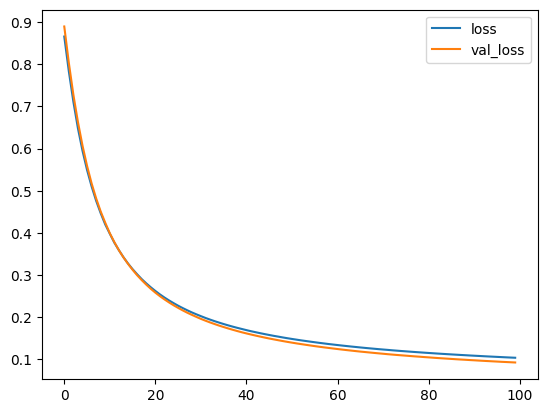

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

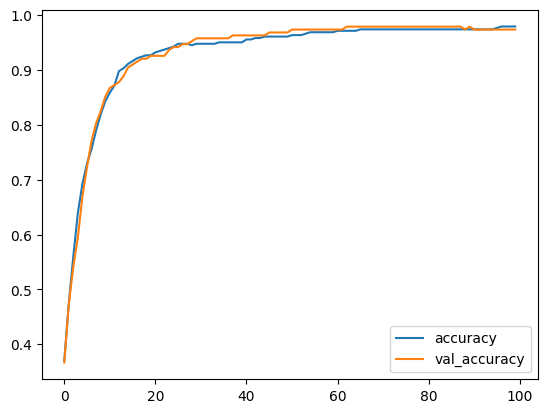

In [17]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [18]:
pred = model.predict(X_test)

6/6 [==============================] - 0s 6ms/step


In [19]:
import numpy as np
P = np.round(pred).flatten()

In [20]:
P

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1.], dtype=float32)

In [21]:
print(f"Manually calculated accuracy: {np.mean(P == y_test)}")
print(f"Evaluate output: {model.evaluate(X_test, y_test)}")

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9734
Evaluate output: [0.09233509004116058, 0.9734042286872864]


In [22]:
model.save("linearclassifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model = tf.keras.models.load_model("linearclassifier.h5")
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9734


[0.09233509004116058, 0.9734042286872864]